In [159]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import cross_val_score

# Function for plotting graphs

In [149]:
#function to define plots
def define_plot(clf, X, y, title, index, dims):
    plt.subplot(dims[0], dims[1], index)
    plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)
    plt.xlabel(X.columns[0], size=14)
    plt.ylabel(X.columns[1], size=14)
    plt.title(title, size=16)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')

# Functions for labeling data and creating data

In [150]:
#training data uniform 
def uniform_data(data_size):
    return np.random.uniform(low=-5, high=5, size=data_size)

In [151]:
### Simple perceptron And with random data
### add in noise
def and_label_with_noise(df):
    rtn = []
    offset = 1
    for i in range(df.shape[0]):
        x = df['X'][i]
        y = df['Y'][i]
        if((x<offset and x>-offset) and (y<offset and y>-offset)):
            if(random.randint(0,10) <= 5):
                if df['X'][i] >= df['Y'][i]:
                    rtn.append(-1)
                else:
                    rtn.append(1)
            else:
                if df['X'][i] >= df['Y'][i]:
                    rtn.append(1)
                else:
                    rtn.append(-1)
                    
        else:
            if df['X'][i] >= df['Y'][i]:
                rtn.append(1)
            else:
                rtn.append(-1)
    return rtn

In [152]:
### Simple perceptron And with random data
def and_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if df['X'][i] >= df['Y'][i]:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

In [231]:
def xor_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if (df['X'][i] >= 0 and df['Y'][i] < 0) or (df['X'][i] < 0 and df['Y'][i] >= 0):
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

# Testing svm -c softmargin values with linear kernel

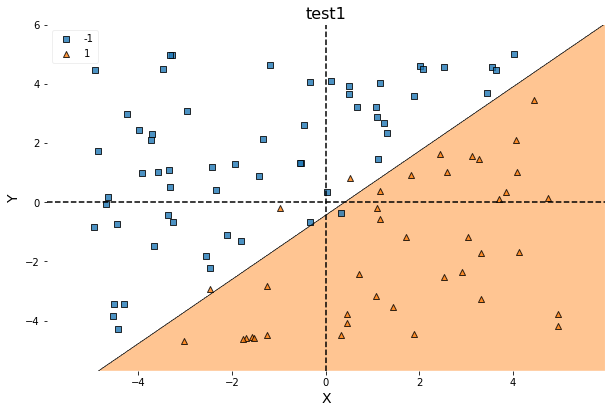

In [243]:
x_1 = uniform_data(100)
y_1 = uniform_data(100)

x_2 = uniform_data(200)
y_2 = uniform_data(200)

and_df_train = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_train['Label'] = and_label_with_noise(and_df_train)

X = and_df_train[['X', 'Y']]
y = and_df_train['Label']


and_df_test = pd.DataFrame({'X': x_2,
                       'Y': y_2})
and_df_test['Label'] = and_label(and_df_test)

X_test = and_df_test[['X', 'Y']]
y_test = and_df_test['Label']

clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X.values, y.values)
plt.figure(figsize=(22,14))
dims = [2,2]
define_plot(clf, X, y, "test1", 1, dims)

In [244]:
clf_1 = svm.SVC(kernel='linear', C = 1.0)
clf_2 = svm.SVC(kernel='linear', C = 0.05)
clf_3 = svm.SVC(kernel='linear', C = 0.01)
clf_4 = svm.SVC(kernel='linear', C = 0.005)

In [245]:
scores_1 = cross_val_score(clf_1, X.values, y.values, cv=5)
scores_2 = cross_val_score(clf_2, X.values, y.values, cv=5)
scores_3 = cross_val_score(clf_3, X.values, y.values, cv=5)
scores_4 = cross_val_score(clf_4, X.values, y.values, cv=5)
print(scores_1)
print("svm-c linear soft margin cross validation mean, 95% confidence interval")
print("linear c-soft margin value of 1.00: %0.2f, (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2)) 
print("linear c-soft margin value of 0.05: %0.2f, (+/- %0.2f)" % (scores_2.mean(), scores_2.std() * 2)) 
print("linear c-soft margin value of 0.01: %0.2f, (+/- %0.2f)" % (scores_3.mean(), scores_3.std() * 2)) 
print("linear c-soft margin value of 0.005: %0.2f, (+/- %0.2f)" % (scores_4.mean(), scores_4.std() * 2)) 

[1.   0.95 0.85 1.   0.95]
svm-c linear soft margin cross validation mean, 95% confidence interval
linear c-soft margin value of 1.00: 0.95, (+/- 0.11)
linear c-soft margin value of 0.05: 0.95, (+/- 0.06)
linear c-soft margin value of 0.01: 0.93, (+/- 0.08)
linear c-soft margin value of 0.005: 0.92, (+/- 0.10)


In [246]:
clf_1.fit(X.values, y.values)
clf_2.fit(X.values, y.values)
clf_3.fit(X.values, y.values)
clf_4.fit(X.values, y.values)

SVC(C=0.005, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

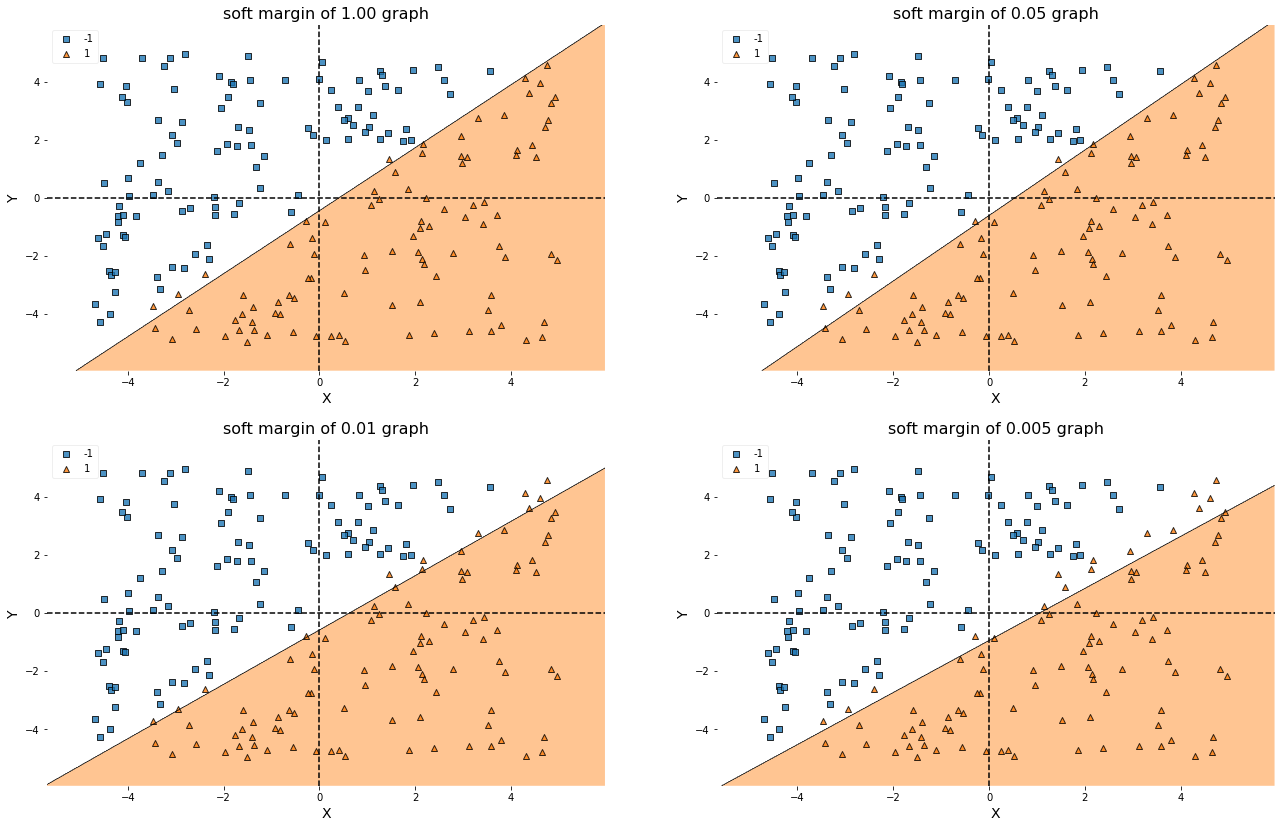

soft margin of 1.00 accuracy: 98.0 %
soft margin of 0.05 accuracy: 97.0 %
soft margin of 0.01 accuracy: 94.0 %
soft margin of 0.005 accuracy: 91.0 %


In [249]:
plt.figure(figsize=(22,14))
dims = [2,2]
define_plot(clf_1, X_test, y_test, "soft margin of 1.00 graph", 1, dims)
define_plot(clf_2, X_test, y_test, "soft margin of 0.05 graph", 2, dims)
define_plot(clf_3, X_test, y_test, "soft margin of 0.01 graph", 3, dims)
define_plot(clf_4, X_test, y_test, "soft margin of 0.005 graph", 4, dims)
plt.show()

print("soft margin of 1.00 accuracy: " + str(clf_1.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.05 accuracy: " + str(clf_2.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.01 accuracy: " + str(clf_3.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.005 accuracy: " + str(clf_4.score(X_test.values, y_test.values)*100) + " %")

# Testing svm -c softmargin values with rbf kernel

In [251]:
def xor_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if (df['X'][i] >= 0 and df['Y'][i] < 0) or (df['X'][i] < 0 and df['Y'][i] >= 0):
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

In [257]:
x_1 = uniform_data(100)
y_1 = uniform_data(100)

x_2 = uniform_data(200)
y_2 = uniform_data(200)

and_df_train = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_train['Label'] = xor_label(and_df_train)

X = and_df_train[['X', 'Y']]
y = and_df_train['Label']


and_df_test = pd.DataFrame({'X': x_2,
                       'Y': y_2})
and_df_test['Label'] = xor_label(and_df_test)

X_test = and_df_test[['X', 'Y']]
y_test = and_df_test['Label']


In [258]:
clf_1 = svm.SVC(kernel='rbf', C = 1.0, gamma="auto")
clf_2 = svm.SVC(kernel='rbf', C = 0.7, gamma="auto")
clf_3 = svm.SVC(kernel='rbf', C = 0.4, gamma="auto")
clf_4 = svm.SVC(kernel='rbf', C = 0.1, gamma="auto")

In [259]:
scores_1 = cross_val_score(clf_1, X.values, y.values, cv=5)
scores_2 = cross_val_score(clf_2, X.values, y.values, cv=5)
scores_3 = cross_val_score(clf_3, X.values, y.values, cv=5)
scores_4 = cross_val_score(clf_4, X.values, y.values, cv=5)
print(scores_1)
print("svm-c rbf soft margin value of 1.00 cross validation mean, 95% confidence interval")
print("rbf c-soft margin value of 1.0: %0.2f, (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2)) 
print("rbf c-soft margin value of 0.8: %0.2f, (+/- %0.2f)" % (scores_2.mean(), scores_2.std() * 2)) 
print("rbf c-soft margin value of 0.6: %0.2f, (+/- %0.2f)" % (scores_3.mean(), scores_3.std() * 2)) 
print("rbf c-soft margin value of 0.4: %0.2f, (+/- %0.2f)" % (scores_4.mean(), scores_4.std() * 2)) 

[0.95238095 0.85714286 1.         0.89473684 0.84210526]
svm-c rbf soft margin value of 1.00 cross validation mean, 95% confidence interval
rbf c-soft margin value of 1.0: 0.91, (+/- 0.12)
rbf c-soft margin value of 0.8: 0.91, (+/- 0.12)
rbf c-soft margin value of 0.6: 0.89, (+/- 0.08)
rbf c-soft margin value of 0.4: 0.55, (+/- 0.06)


In [260]:
clf_1.fit(X.values, y.values)
clf_2.fit(X.values, y.values)
clf_3.fit(X.values, y.values)
clf_4.fit(X.values, y.values)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

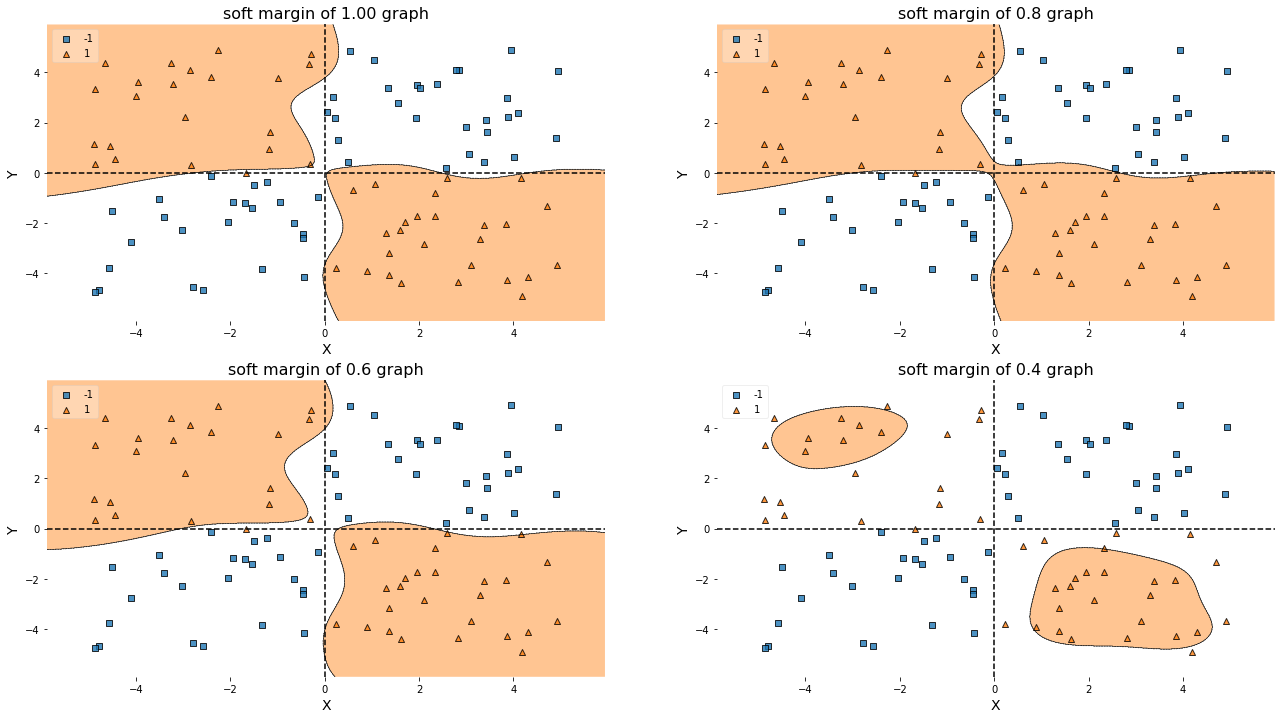

soft margin of 1.00 accuracy: 96.5 %
soft margin of 0.8 accuracy: 96.0 %
soft margin of 0.6 accuracy: 95.5 %
soft margin of 0.4 accuracy: 67.5 %


In [261]:
plt.figure(figsize=(22,12))
dims = [2,2]
define_plot(clf_1, X, y, "soft margin of 1.00 graph", 1, dims)
define_plot(clf_2, X, y, "soft margin of 0.8 graph", 2, dims)
define_plot(clf_3, X, y, "soft margin of 0.6 graph", 3, dims)
define_plot(clf_4, X, y, "soft margin of 0.4 graph", 4, dims)
plt.show()

print("soft margin of 1.00 accuracy: " + str(clf_1.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.8 accuracy: " + str(clf_2.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.6 accuracy: " + str(clf_3.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.4 accuracy: " + str(clf_4.score(X_test.values, y_test.values)*100) + " %")

# Using cross validation to test best kernel types for specific data sets

In [ ]:
x_1 = uniform_data(100)
y_1 = uniform_data(100)

x_2 = uniform_data(200)
y_2 = uniform_data(200)

and_df_train = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_train['Label'] = and_label_with_noise(and_df_train)

X = and_df_train[['X', 'Y']]
y = and_df_train['Label']


and_df_test = pd.DataFrame({'X': x_2,
                       'Y': y_2})
and_df_test['Label'] = and_label(and_df_test)

X_test = and_df_test[['X', 'Y']]
y_test = and_df_test['Label']

clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X.values, y.values)
plt.figure(figsize=(22,14))
dims = [2,2]
define_plot(clf, X, y, "test1", 1, dims)

In [ ]:
clf_1 = svm.SVC(kernel='linear', C = 1.0)
clf_2 = svm.SVC(kernel='poly', degree=2, gamma="auto")
clf_3 = svm.SVC(kernel='poly', degree=5, gamma="auto")
clf_4 = svm.SVC(kernel='poly', degree=10, gamma="auto")
clf_5 = svm.SVC(kernel='poly', degree=20, gamma="auto")
clf_6 = svm.SVC(kernel='rbf', C = 1.0, gamma="auto")
clf_7 = svm.SVC(kernel='sigmoid', C = 1.0, gamma="auto")
